## Dataset Investigation
In this Jupyter notebook, I would like to investigate Atari Grand Challenge v2 data using python.

1. Basic Stats
2. Distributions of Scores over Frames
3. Distributions of Actions in the dataset

## 1. Basic Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GAME_NAMES  = ["spaceinvaders", "qbert", "mspacman", "pinball", "revenge"]

In [2]:
# import all data
mspacman = './trajectories/mspacman/summary.txt'
pinball = './trajectories/pinball/summary.txt'
qbert = './trajectories/qbert/summary.txt'
revenge = './trajectories/revenge/summary.txt'
spaceinvaders = './trajectories/spaceinvaders/summary.txt'

mspacman = pd.read_csv(mspacman)
pinball = pd.read_csv(pinball)
qbert = pd.read_csv(qbert)
revenge = pd.read_csv(revenge)
spaceinvaders = pd.read_csv(spaceinvaders)

In [3]:
# check columns in data
mspacman.columns

Index(['num_of_episode', 'frame', 'reward', 'score', 'terminal', 'action'], dtype='object')

In [4]:
# summarise the data
print("spaceinvaders, qbert, mspacman, pinball, revenge")
print("Number of Frames: spaceinvaders: {0}, qbert: {1}, mspacman: {2}, pinball: {3}, revenge: {4}".format(spaceinvaders.shape, qbert.shape, mspacman.shape, pinball.shape, revenge.shape))
print("Number of Episodes: spaceinvaders: {0}, qbert: {1}, mspacman: {2}, pinball: {3}, revenge: {4}".format(spaceinvaders['num_of_episode'].max(), qbert['num_of_episode'].max(), mspacman['num_of_episode'].max(), pinball['num_of_episode'].max(), revenge['num_of_episode'].max()))
print("Best score: spaceinvaders: {0}, qbert: {1}, mspacman: {2}, pinball: {3}, revenge: {4}".format(spaceinvaders['score'].max(), qbert['score'].max(), mspacman['score'].max(), pinball['score'].max(), revenge['score'].max()))

temp = list()
for data in [spaceinvaders, qbert, mspacman, pinball, revenge]:
    temp.append(min([data["score"][data['num_of_episode'] == episode].max() for episode in list(data['num_of_episode'].unique())]))

print("Worst score: spaceinvaders: {0}, qbert: {1}, mspacman: {2}, pinball: {3}, revenge: {4}".format(temp[0], temp[1], temp[2], temp[3], temp[4]))

spaceinvaders, qbert, mspacman, pinball, revenge
Number of Frames: spaceinvaders: (4005345, 6), qbert: (3329088, 6), mspacman: (2829068, 6), pinball: (2352787, 6), revenge: (4623879, 6)
Number of Episodes: spaceinvaders: 1052, qbert: 1862, mspacman: 1030, pinball: 687, revenge: 2793
Best score: spaceinvaders: 3260, qbert: 35675, mspacman: 20241, pinball: 49345, revenge: 10000
Worst score: spaceinvaders: 5, qbert: 25, mspacman: 10, pinball: 1, revenge: 100


| Title | spaceinvaders | qbert | mspacman | pinball | revenge |
| ------|------|------|------|------|------|
| Episodes |   905  | 1136 | 667 | 380 | 1196 |
| Frames |   4005345  | 3329088| 2829068| 2352787 | 4623879 |
| Worst score |   5  | 25 | 10 | 1 | 100 |
| Best score |   3260  | 35675 | 20241 | 49345 | 10000 |

## 2. Distributions of Scores over Frames

(905, 2)


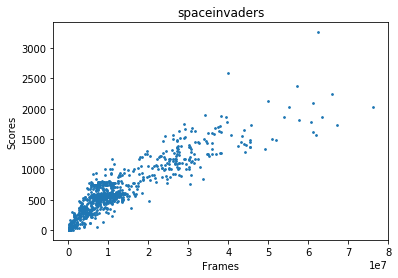

(1136, 2)


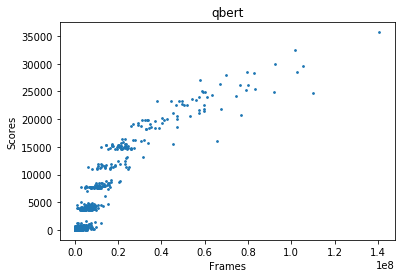

(667, 2)


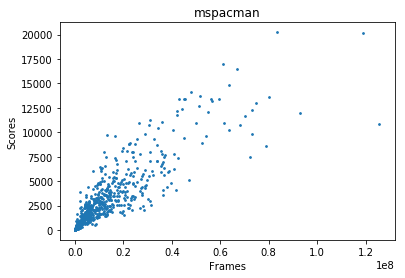

(380, 2)


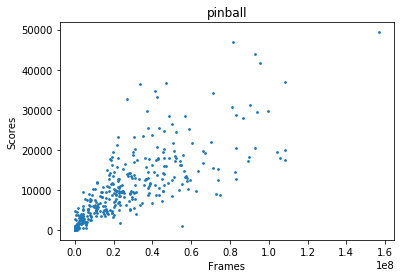

(1196, 2)


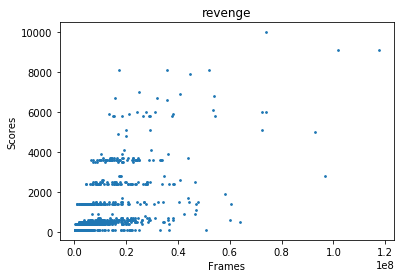

In [5]:
for data, data_name in zip([spaceinvaders, qbert, mspacman, pinball, revenge], GAME_NAMES):
    temp = list()
    temp.append([ [sum(data["frame"][data['num_of_episode'] == episode]), data["score"][data['num_of_episode'] == episode].max()] for episode in list(data['num_of_episode'].unique())])
    print(np.array(temp[0]).shape)
    temp = np.array(temp[0])
    plt.scatter(temp[:,0], temp[:,1], s=3)
    plt.xlabel("Frames")
    plt.ylabel("Scores")
    plt.title("{}".format(data_name))
    plt.savefig("./images/score_frame_{0}".format(data_name))
    plt.show()

## 3. Distributions of Actions in the dataset

Note: As you can see below, in this dataset, they encoded the actions quite uniquely compared to OpenAIGym so that we can simply train the model with this dataset.  

|       name        |       action       |
|:-----------------:|:------------------:|
|       NOOP        |0|
|       FIRE        |1|
|        UP         |2|
|      RIGHT        |3|
|       LEFT        |4|
|       DOWN        |5|
|     UPRIGHT       |6|
|      UPLEFT       |7|
|    DOWNRIGHT      |8|
|     DOWNLEFT      |9|
|      UPFIRE       |10|
|    RIGHTFIRE      |11|
|     LEFTFIRE      |12|
|     DOWNFIRE      |13|
|    UPRIGHTFIRE    |14|
|    UPLEFTFIRE     |15| 
|   DOWNRIGHTFIRE   |16| 
|   DOWNLEFTFIRE    |17|

### Ms.Pacman in OpenAIGym
|       name        |       action       |
|:-----------------:|:------------------:|
|       NOOP        |0|
|        UP         |1|
|      RIGHT        |2|
|       LEFT        |3|
|       DOWN        |4|
|     UPRIGHT       |5|
|      UPLEFT       |6|
|    DOWNRIGHT      |7|
|     DOWNLEFT      |8|

In [6]:
import gym

env = gym.make('MsPacman-v0')

print(env.env.get_action_meanings())

['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


===== spaceinvaders===== 
0     1889726
3      718514
1      716305
4      521919
11      89330
12      62927
2        3196
5        1039
6        1012
7         630
10        242
8         240
9         118
16         73
13         30
17         28
14         12
15          4
Name: action, dtype: int64


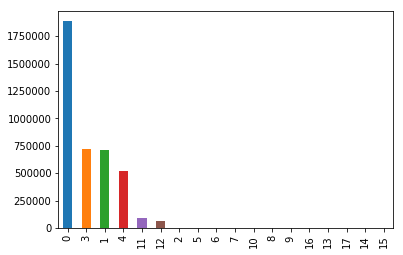


===== qbert===== 
0     2588368
3      227382
5      208284
4      160911
2      133092
1        3371
6        2646
9        2192
7        1284
8         865
11        363
12        283
10         27
13         19
14          1
Name: action, dtype: int64


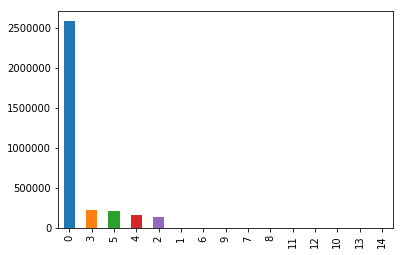


===== mspacman===== 
0     1430493
3      380917
4      379688
2      300404
5      269034
6       14160
7       13151
8       12775
9       12612
11       3811
12       3109
10       2977
1        2595
13       2587
16        356
14        289
17        110
Name: action, dtype: int64


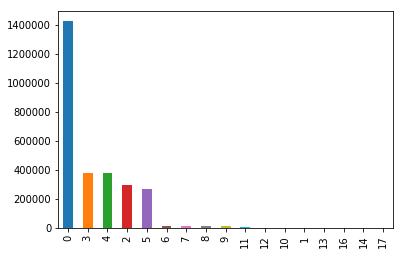


===== pinball===== 
0     2007226
2       97403
4       86702
3       78482
5       49256
1       23488
7        7504
13       1274
6         498
10        390
9         156
8         134
11        130
12         78
17         61
15          3
16          1
14          1
Name: action, dtype: int64


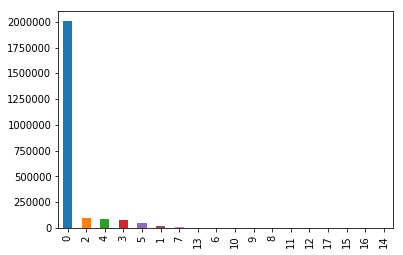


===== revenge===== 
0     2346369
3      727521
4      573031
5      428586
2      220516
11     120404
12      97352
1       45399
8       14688
6       12956
7       12459
9       11460
10       6149
14       3151
15       2165
13       1305
16        195
17        173
Name: action, dtype: int64


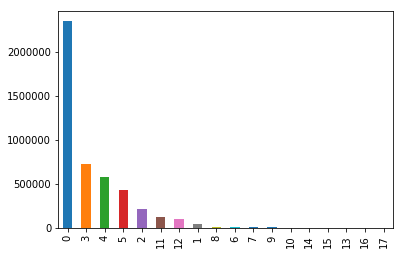

In [7]:
# check the whole distributions of the actions
for data, data_name in zip([spaceinvaders, qbert, mspacman, pinball, revenge], GAME_NAMES):
    print("===== " + data_name + "===== ")
    print(data['action'].value_counts())
    data['action'].value_counts().plot.bar()
    plt.savefig("./images/action_distribution_{0}".format(data_name))
    plt.show()
    print("")

===== spaceinvaders===== 
0     53237
1     24200
3     20322
4     14009
11     2974
12     2012
5        37
8        20
2        19
Name: action, dtype: int64


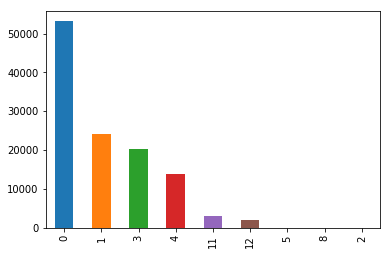


===== qbert===== 
0    53025
3     8631
5     7221
4     6014
2     4358
1      126
9       63
6       17
8        9
7        6
Name: action, dtype: int64


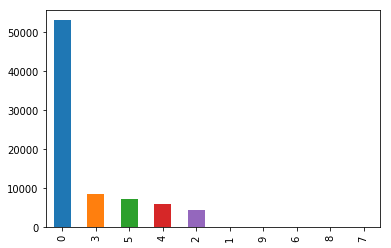


===== mspacman===== 
0     101178
3      71228
4      68284
2      51910
5      49358
8       2834
6       2811
7       2775
9       2643
1         36
10         3
Name: action, dtype: int64


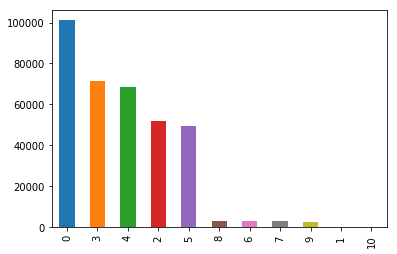


===== pinball===== 
0     55480
2      2161
4      1964
3      1962
5      1490
1       800
13       41
7        35
6         9
9         6
8         6
Name: action, dtype: int64


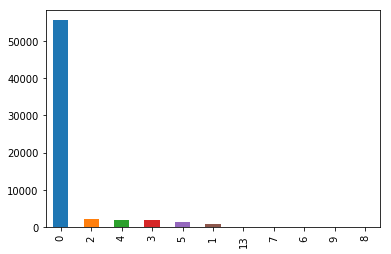


===== revenge===== 
0     28760
3     10277
4      8413
5      6180
2      3670
11     1373
12     1189
8       520
1       487
9       452
10      371
6       371
7       352
14      292
15      186
13       56
Name: action, dtype: int64


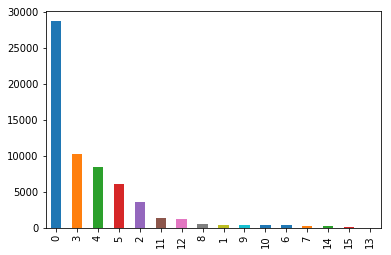

In [8]:
# check top 5% distributions of the actions
for data, data_name in zip([spaceinvaders, qbert, mspacman, pinball, revenge], GAME_NAMES):
    print("===== " + data_name + "===== ")
    t = mspacman['score'].groupby(mspacman['num_of_episode']).max().sort_values(ascending=False)
    data = data[data['num_of_episode'].isin(list(t[:int(len(t)*0.05)].index))]
    print(data['action'].value_counts())
    data['action'].value_counts().plot.bar()
    plt.savefig("./images/action_distribution_5per_{0}".format(data_name))
    plt.show()
    print("")

===== spaceinvaders===== 
0     4661
1     4456
3     2351
4     1424
12     973
11     838
8        3
Name: action, dtype: int64


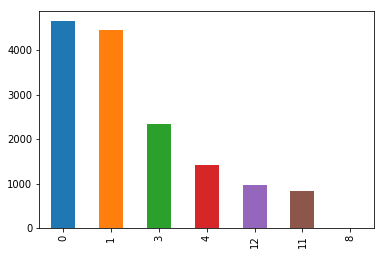


===== qbert===== 
0    8319
3    1458
5    1359
4    1024
2     594
1      68
9       6
7       1
Name: action, dtype: int64


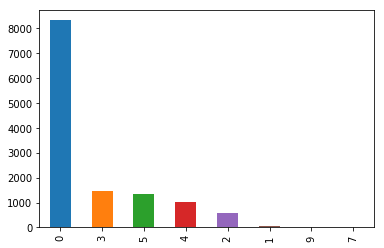


===== mspacman===== 
0    20356
3    15347
4    13681
2    10489
5    10390
7      486
8      460
6      437
9      372
Name: action, dtype: int64


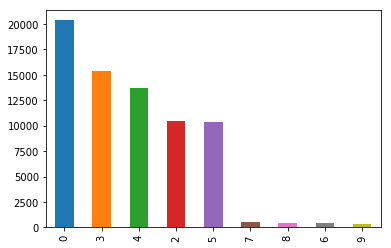


===== pinball===== 
0     9672
2     1015
4      463
3      450
5      442
1      271
13      19
Name: action, dtype: int64


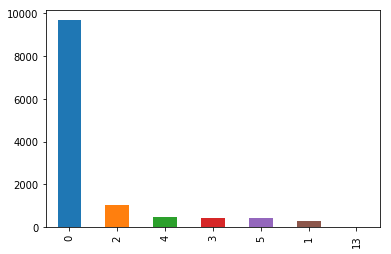


===== revenge===== 
0     6192
3     2524
4     1865
5     1532
2      752
11     337
8      284
12     274
9      140
1       86
6       56
7       43
15       5
14       1
Name: action, dtype: int64


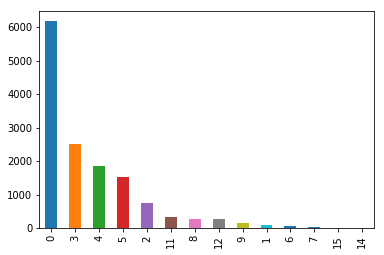

In [9]:
# check top 1% distributions of the actions
for data, data_name in zip([spaceinvaders, qbert, mspacman, pinball, revenge], GAME_NAMES):
    print("===== " + data_name + "===== ")
    t = mspacman['score'].groupby(mspacman['num_of_episode']).max().sort_values(ascending=False)
    data = data[data['num_of_episode'].isin(list(t[:int(len(t)*0.01)].index))]
    print(data['action'].value_counts())
    data['action'].value_counts().plot.bar()
    plt.savefig("./images/action_distribution_1per_{0}".format(data_name))
    plt.show()
    print("")